[Website Pytorch.io](https://www.learnpytorch.io/)

__What is Neural Network__






### Pytorch Fundamentals

In [1]:
import torch
import pandas as pd
import numpy as np

torch.__version__

'2.8.0'

__Tensors__


Tensors are the fundamental building block of machine learning.

Their job is to represent data in a numerical way.

For example, you could represent an image as a tensor with shape [3, 224, 224] which would mean [colour_channels, height, width], as in the image has 3 colour channels (red, green, blue), a height of 224 pixels and a width of 224 pixels

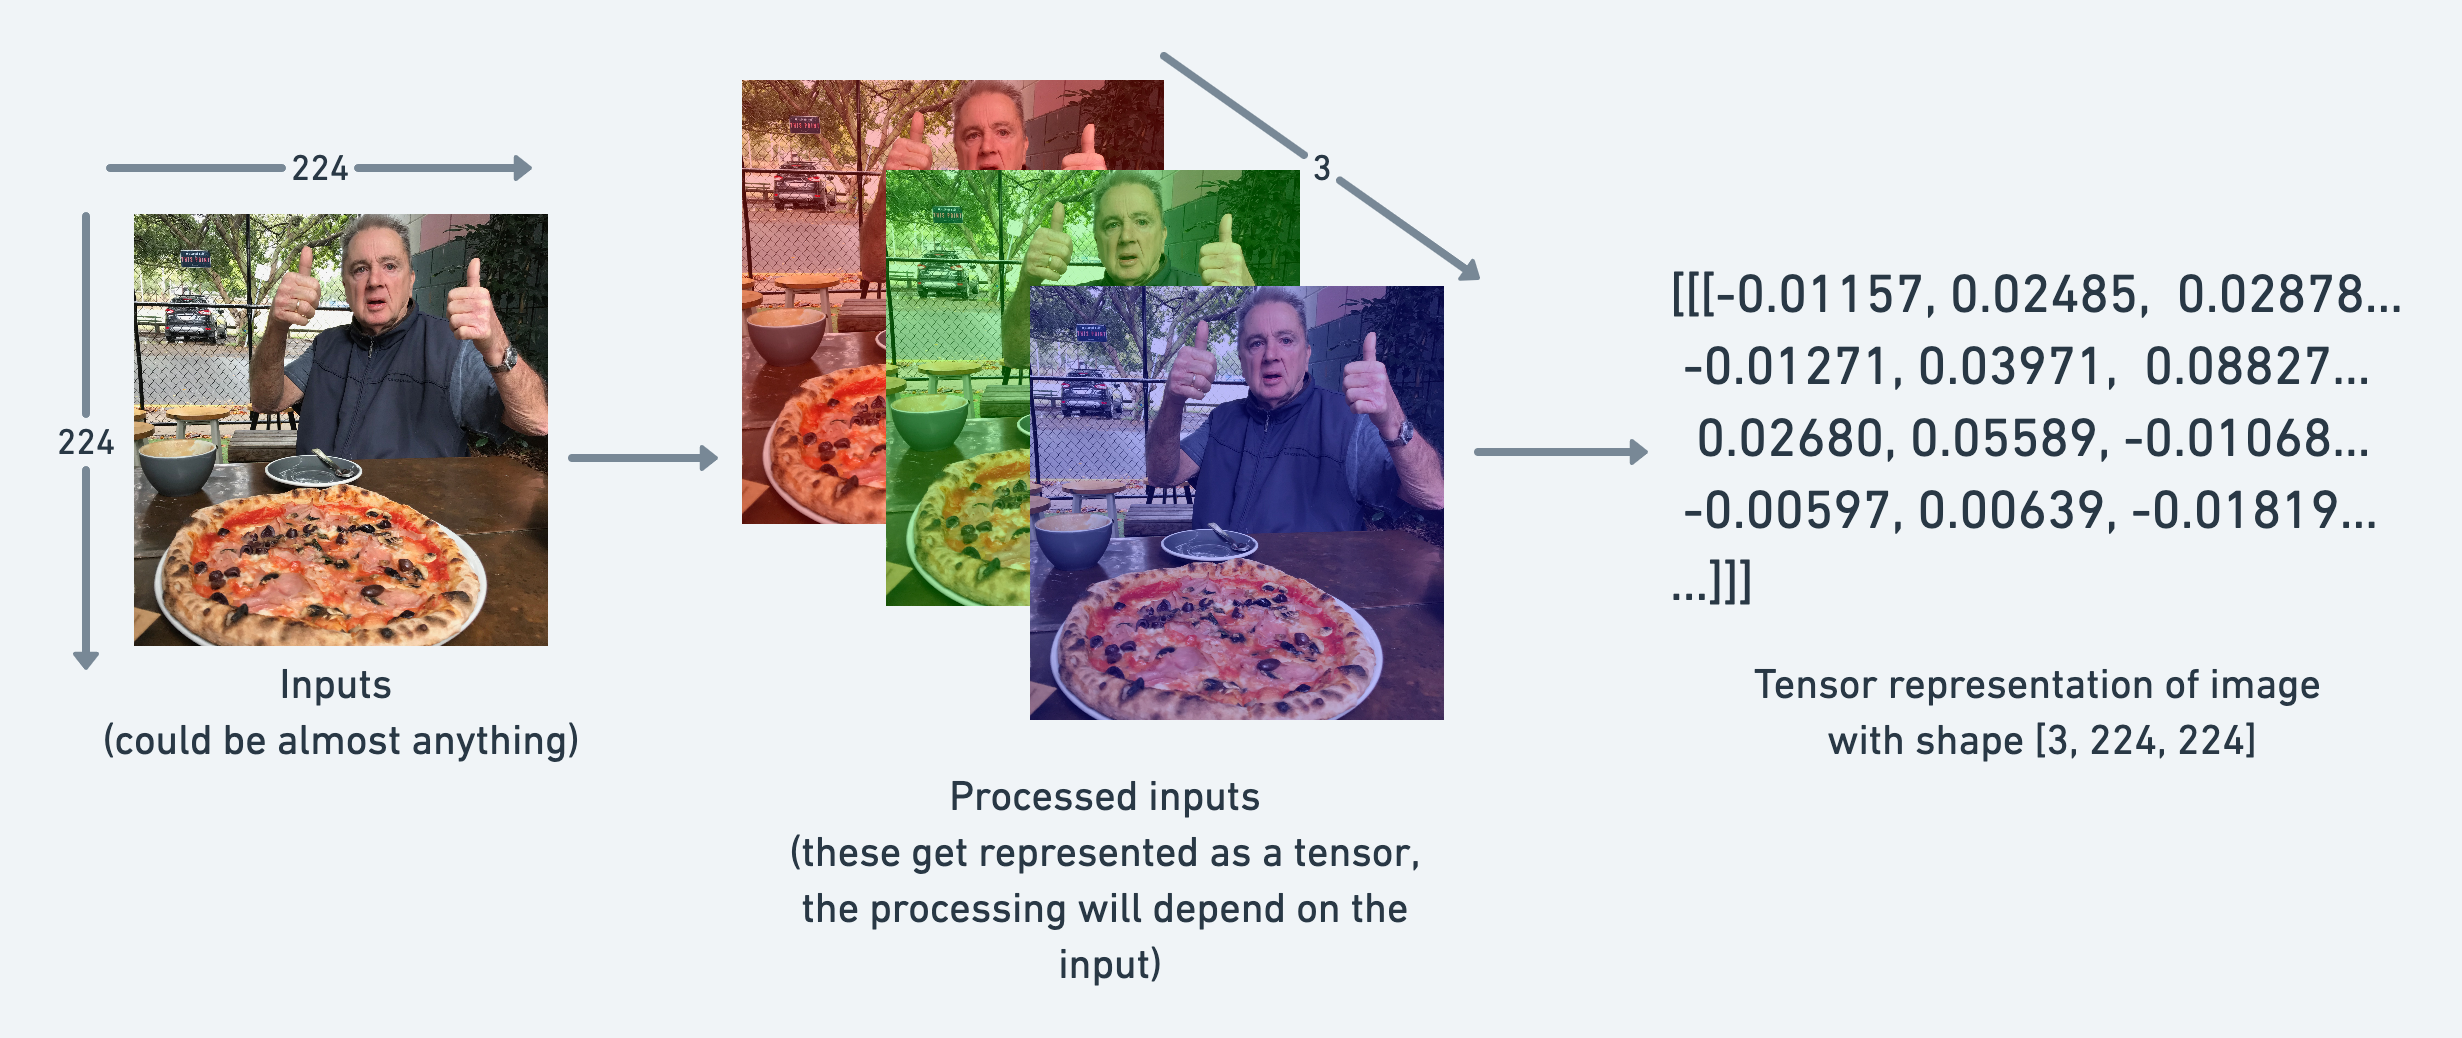

In tensor-speak (the language used to describe tensors), the tensor would have three dimensions, one for colour_channels, height and width.

A scalar is a single number and in tensor-speak it's a zero dimension tensor.

In [10]:
scaler = torch.tensor(7)
scaler

tensor(7)

although scalar is a single number, it's of type torch.Tensor.

In [12]:
# we can check the dimesion of tensor 

scaler.ndim

0

In [14]:
# Get the python number within a tensor (works only with one-dimensional) tensors

scaler.item()

7

A vector is a single dimension tensor but can contain many numbers.

As in, you could have a vector [3, 2] to describe [bedrooms, bathrooms] in your house. Or you could have [3, 2, 2] to describe [bedrooms, bathrooms, car_parks] in your house.

The important trend here is that a vector is flexible in what it can represent (the same with tensors).

In [16]:
vector = torch.tensor([3,4,2])
vector

tensor([3, 4, 2])

In [18]:
vector.ndim

1

In [22]:
vector.shape

torch.Size([3])

In [28]:
# Matrix 

matrix = torch.tensor([[1,2],
                       [3,4]])
matrix

tensor([[1, 2],
        [3, 4]])

In [30]:
matrix.ndim

2

In [32]:
matrix.shape

torch.Size([2, 2])

In [34]:
print(matrix[0])
print(matrix[0][1])

tensor([1, 2])
tensor(2)


In [42]:
tensor =  torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

tensor1 =  torch.tensor([[[1,2,3],
                          [4,5,6],
                          [7,8,9]]])

In [44]:
print(tensor.shape)
print(tensor1.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])


__Random Tensor__

We've established tensors represent some form of data.

And machine learning models such as neural networks manipulate and seek patterns within tensors.

But when building machine learning models with PyTorch, it's rare you'll create tensors by hand (like what we've been doing).

Instead, a machine learning model often starts out with large random tensors of numbers and adjusts these random numbers as it works through data to better represent it.

In essence:

Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...

In [11]:
random_tensor = torch.rand(1,2,5)
print(random_tensor)

tensor([[[0.9230, 0.4319, 0.3992, 0.1011, 0.9746],
         [0.4614, 0.1178, 0.0870, 0.4425, 0.4074]]])


In [13]:
random_tensor.ndim

3

__Zeros & Ones__

In [16]:
zero = torch.zeros(2,2)
zero

tensor([[0., 0.],
        [0., 0.]])

In [18]:
one = torch.ones(2,2)
one

tensor([[1., 1.],
        [1., 1.]])

In [20]:
one.dtype

torch.float32

In [30]:
print(torch.arange(0,10))
print(torch.arange(start=0, end=10, step=2))
print(torch.arange(start=0, end=10, step=3))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 2, 4, 6, 8])
tensor([0, 3, 6, 9])


In [36]:
# tensors like

print(random_tensor.shape)

torch.zeros_like(input=random_tensor)

torch.Size([1, 2, 5])


tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

__Changing datatype of tensor__

In [41]:
tensor = torch.tensor([1,5,6])
print(tensor.dtype)

torch.int64


In [43]:
tensor

tensor([1, 5, 6])

In [5]:
tensor = torch.tensor([1,5,6], dtype = torch.float32)
print(tensor)
print(tensor.dtype)

tensor([1., 5., 6.])
torch.float32


In [11]:
tensor.device

device(type='cpu')

__Operations on Tensors__

In [17]:
# Addition 

tensor = torch.tensor([1,2,3])

print(tensor)
print(tensor + 10)
print(tensor - 10)

tensor([1, 2, 3])
tensor([11, 12, 13])
tensor([-9, -8, -7])


In [19]:
torch.mul(tensor, 10)

tensor([10, 20, 30])

__Matrix Multiplication__

1. Element Wise multiplication
2. Dot Product

In [28]:
print(tensor)
print(f"Elementwise Multiplication: {tensor*tensor}") 
print(f"Dot product : {torch.matmul(tensor, tensor)}")

tensor([1, 2, 3])
Elementwise Multiplication: tensor([1, 4, 9])
Dot product : 14


In [33]:
%%time
print(tensor@tensor)

tensor(14)
CPU times: user 1.11 ms, sys: 1.12 ms, total: 2.23 ms
Wall time: 1.43 ms


In [35]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 175 μs, sys: 98 μs, total: 273 μs
Wall time: 258 μs


tensor(14)

In [37]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_A.shape

torch.Size([3, 2])

In [39]:
tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

tensor_B.shape

torch.Size([3, 2])

In [41]:
torch.matmul(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [43]:
tensor_C = tensor_B.T
tensor_C

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])

In [45]:
tensor_C.shape

torch.Size([2, 3])

In [47]:
torch.matmul(tensor_A, tensor_C)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

__Tensor Aggregation__

1. Max
2. Min
3. Avg
4. sum

__Reshaping, stacking, squeezing and unsqueezing__

1. `torch.reshape(input, shape)`	Reshapes input to shape (if compatible), can also use torch.Tensor.reshape().
2. `Tensor.view(shape)`	Returns a view of the original tensor in a different shape but shares the same data as the original tensor.
3. `torch.stack(tensors, dim=0)`	Concatenates a sequence of tensors along a new dimension (dim), all tensors must be same size.
4. `torch.squeeze(input)`	Squeezes input to remove all the dimenions with value 1.
5. `torch.unsqueeze(input, dim)`	Returns input with a dimension value of 1 added at dim.
6. `torch.permute(input, dims)`	Returns a view of the original input with its dimensions permuted (rearranged) to dims.

In [5]:
x = torch.arange(1,10)
x, x.shape

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

In [7]:
x.reshape(3,3)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [11]:
x, x.view(3,3)

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]))

In [13]:
import numpy as np

In [15]:
array = np.arange(1,8)
array

array([1, 2, 3, 4, 5, 6, 7])

In [17]:
array.dtype

dtype('int64')

In [19]:
tensor = torch.from_numpy(array)
tensor

tensor([1, 2, 3, 4, 5, 6, 7])

In [21]:
tensor.dtype

torch.int64

### Reproducibility 


https://docs.pytorch.org/docs/stable/notes/randomness.html

In [6]:
import torch
torch.manual_seed(0)

In [8]:
torch.rand(2,2)

tensor([[0.4963, 0.7682],
        [0.0885, 0.1320]])

In [12]:
torch.manual_seed(0)
torch.rand(2,2)

tensor([[0.4963, 0.7682],
        [0.0885, 0.1320]])

## Pytorch on MAC

In [14]:
torch.backends.mps.is_available()

True

In [17]:
device  = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

In [19]:
torch.backends.mps.is_built()

True

__Moving Tensor or Model to GPU__

In [22]:
tensor = torch.tensor([1,2,3])
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [24]:
tensor_gpu = tensor.to(device)
print(tensor_gpu, tensor_gpu.device)

tensor([1, 2, 3], device='mps:0') mps:0


----

### __Pytorch WorkFlow Fundamentals__

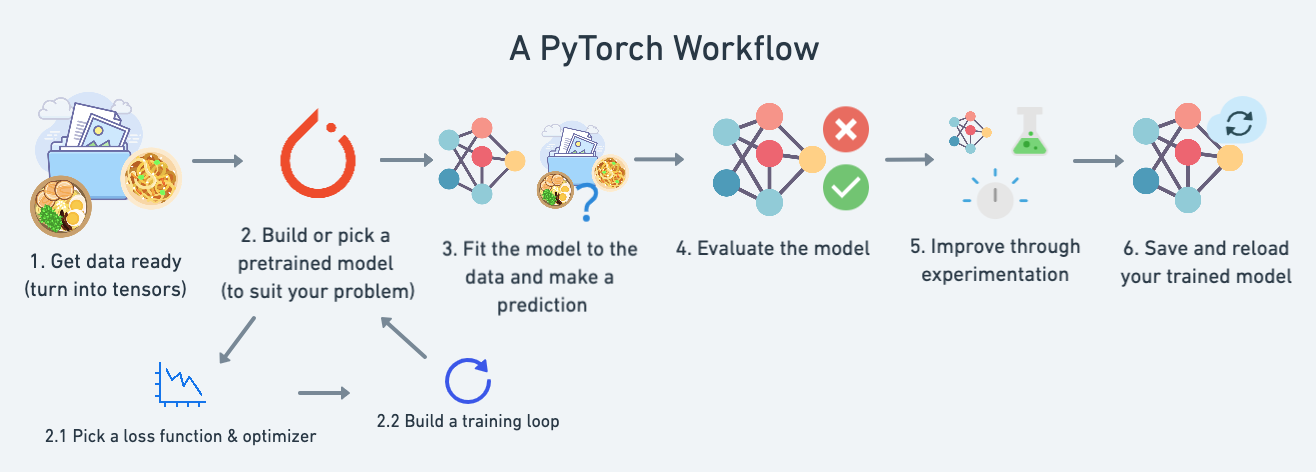

In [28]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [29]:
# Building dummy data using linear regression algorithm 

weight = 0.7
bias = 0.3


start = 0
end = 1
steps = 0.02


X = torch.arange(start, end, steps).unsqueeze(dim=1)
print(X[:4])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600]])


In [30]:
y = weight * X + bias
print(y[:4])

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420]])


In [31]:
torch.arange(start, end, steps).shape

torch.Size([50])

In [32]:
X.shape

torch.Size([50, 1])

In [33]:
# Splitting data into train and test 

train_split = int(0.8 * len(X))
train_split

40

In [34]:
X_train, y_train = X[:train_split], y[:train_split] 
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

In [35]:
def plot_predicitions(train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions =  None):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label = 'Training')
    plt.scatter(test_data, test_labels, c='g',   s=4, label = 'Test')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r',   s=4, label = 'Predictions')

    plt.legend(prop = {'size':14})

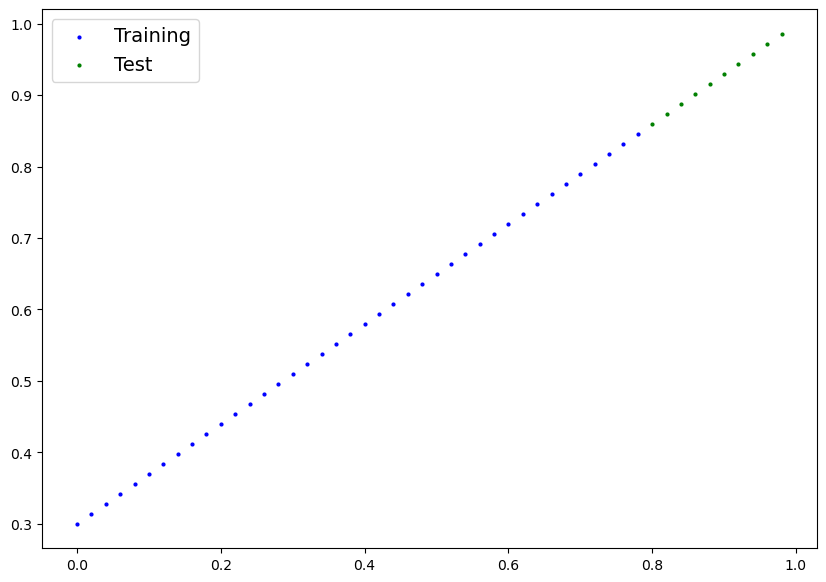

In [36]:
plot_predicitions()

In [97]:
# Building Model 

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias    

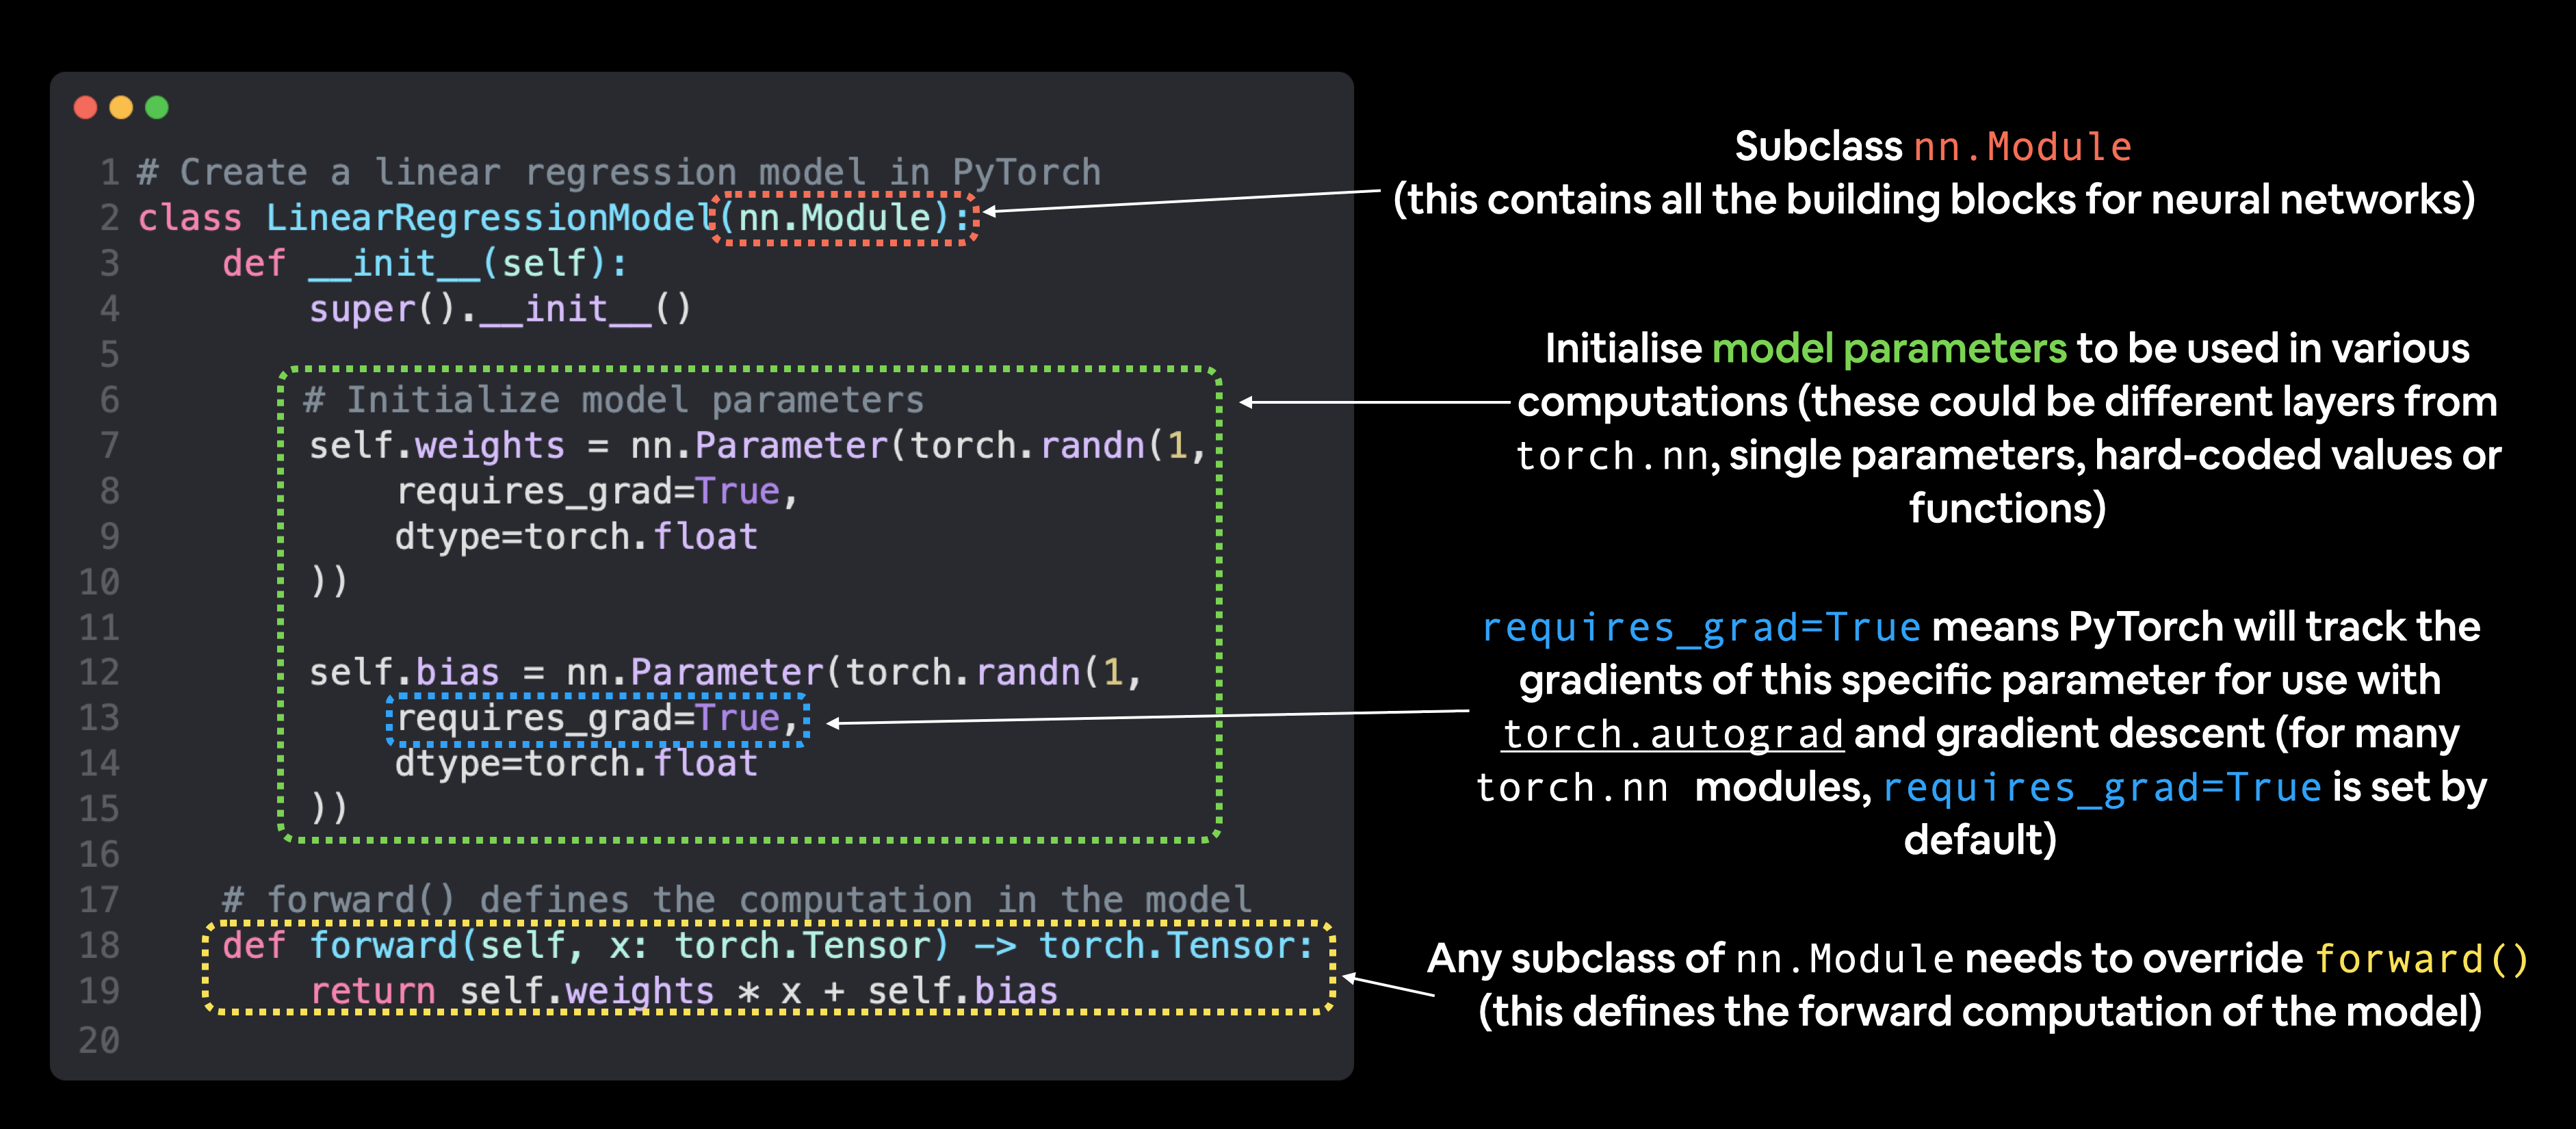

- `torch.nn` :: Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
- `torch.nn.Parameter` ::	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
- `torch.nn.Module` ::	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
- `torch.optim` ::	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
- `def forward()` ::	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

In [102]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

__Making Predictions with the Model__

In [40]:
# these predictions are made without training the model, just based on random intizaliation for torch

with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

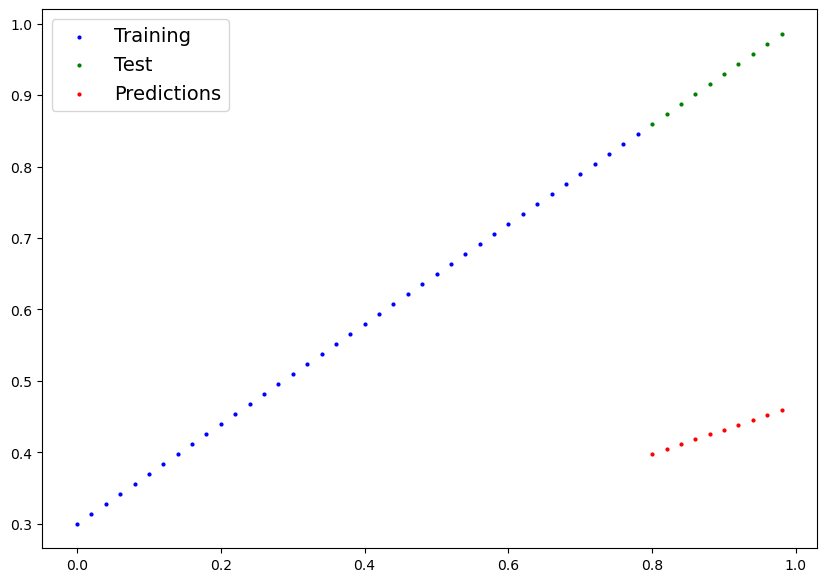

In [41]:
plot_predicitions(predictions=y_pred)

__Training Model__


And model to update its parameters on its own, it need to add a few more things :-


1. Loss/Cost Function --> Measures how wrong your model's predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.	Mean absolute error (MAE) for regression problems `(torch.nn.L1Loss())`. Binary cross entropy for binary classification problems `(torch.nn.BCELoss())`.


2. Optimizer --> Tells your model how to update its internal parameters to best lower the loss.	Stochastic gradient descent `(torch.optim.SGD())`. Adam optimizer `(torch.optim.Adam())`


https://docs.pytorch.org/docs/stable/nn.html#loss-functions

In [43]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
model_0.parameters()

<generator object Module.parameters at 0x16e057300>

- `params` :: is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
- `lr` :: is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).


In [115]:
loss_fn  = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.01)

__Building Training Loop__



1. Forward pass ::	The model goes through all of the training data once, performing its forward() function calculations. 	`model(x_train)`
2. Calculate the loss ::	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. 	`loss = loss_fn(y_pred, y_train)`
3. Zero gradients ::	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. 	`optimizer.zero_grad()`
4. Perform backpropagation on the loss ::	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards". `loss.backward()`
5. Update the optimizer (gradient descent) 	:: Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them. 	`optimizer.step()`

In [117]:
torch.manual_seed(42)


train_loss_values = []
test_loss_values = []
epoch_count = []

epochs = 80

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))


    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())

In [118]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6808])), ('bias', tensor([0.3078]))])

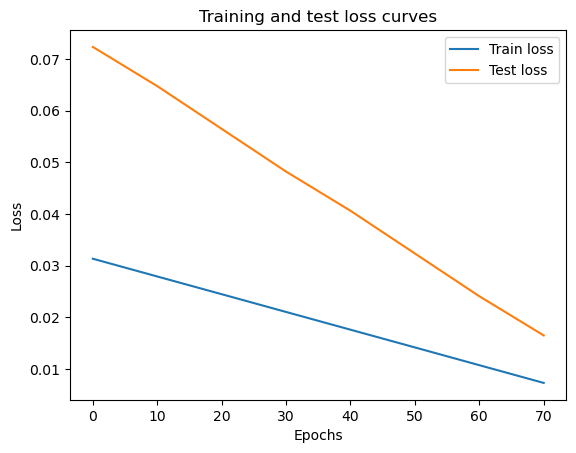

In [119]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

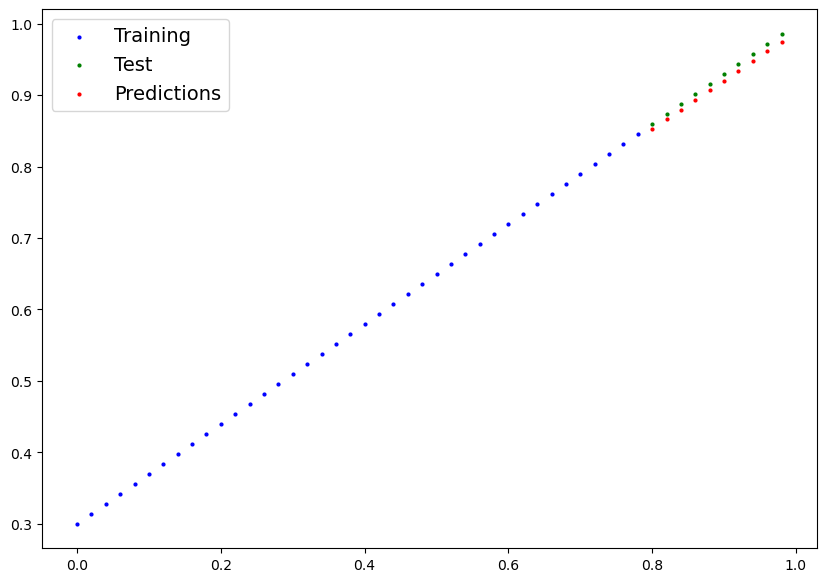

In [120]:
model_0.eval()
with torch.inference_mode():
    y_pred = model_0(X_test)

plot_predicitions(predictions=y_pred)

__Saving Torch Model__


1. `torch.save` 	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
2. `torch.load` 	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
3. `torch.nn.Module.load_state_dict` 	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

In [122]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)


MODEL_NAME = '01_pytorch_model.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [123]:
!ls -l models/

total 8
-rw-r--r--@ 1 d0r1h  staff  1965  2 Oct 07:42 01_pytorch_model.pth


Since we've now got a saved model state_dict() at models/01_pytorch_model.pth we can now load it in using torch.nn.Module.load_state_dict(torch.load(f)) where f is the filepath of our saved model state_dict().

Why call torch.load() inside torch.nn.Module.load_state_dict()?

Because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).

In [124]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>